# Task 1

In [43]:
# pip install networkx

In [44]:
# pip install matplotlib

In [45]:
# pip install fitter

In [46]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import collections
from scipy import stats
import numpy as np
from scipy.stats import binom
from scipy.stats import poisson
from scipy import signal
from scipy.stats import powerlaw

#### Useful functions

Return string with the number of vertices and edges

In [47]:
def numb_vert_ed(G):
    """
    Return string with the number of vertices and edges of the=- graph G.
    def numb_vert_ed(G: nx.Graph) -> str
    """
    return f" has {nx.number_of_nodes(G)} nodes and {nx.number_of_edges(G)} edges"

Calculate the average degree:

$\langle k\rangle = \frac{1}{N}\sum_{i=1}^N k_i =\frac{2L}{N}$

In [48]:
def av_degree(G):
    """
    Return the average degree of the graph G.
    def av_degree(G: nx.Graph) -> float
    """
    return 2 * nx.number_of_edges(G) / nx.number_of_nodes(G)

Calculate the average degree using degree distribution:

$\langle k \rangle = \sum_{k=0}^\infty kp_k$, where

$p_k = \frac{N_k}{N}$ -- probability that a randomly selected node in the network with $N$ nodes has degree $k$, and

$N_k = p_k N$ -- the number of nodes with degree $k$

In [49]:
def av_degree_dist(G):
    """
    Return the average degree of the graph G calculated using the degree distribution.
    def av_degree_dist(G: nx.Graph) -> float
    """
    N = nx.number_of_nodes(G)
    
    degrees = sorted([d for n, d in G.degree()])
    degreeCount = collections.Counter(degrees)
    deg, cnt = zip(*degreeCount.items())
    
    N_k = np.array(cnt)
    p_k = N_k / N
    
    return sum(deg * p_k)

 Calculate the variance of the degree distribution

$Var = \sum_{k=0}^\infty k^2 p_k - (\sum_{k=0}^\infty k p_k)^2 = \sum_{k=0}^\infty k^2 p_k - \langle k \rangle^2$

In [50]:
def var(G):
    """
    Return the variance of the degree distribution.
    def var(G: nx.Graph) -> float
    """
    N = nx.number_of_nodes(G)
    
    degrees = sorted([d for n, d in G.degree()])
    degreeCount = collections.Counter(degrees)
    deg, cnt = zip(*degreeCount.items())
    
    N_k = np.array(cnt)
    p_k = N_k / N
    
    return sum(np.power(deg, 2) * p_k) - av_degree_dist(G)**2

Draw graphs

In [51]:
def draw_graph(G, title = ''):
    """
    Draw the graph.
    def draw_graph(G: nx.Graph, title: str) -> NoReturn
    """
    plt.figure(figsize = (6, 5))
    plt.title(title)
    nx.draw(G, with_labels = True)
    plt.show()

In [52]:
def draw_graphs(graphs, gr_type, parameters):
    """
    Draw several graphs.
    def draw_graphs(graphs: list, gr_type: str, parameters: list) -> NoReturn
    """
    title = ''
    for i in range(len(graphs)):
        if gr_type == 'random':
            title = f'Random graph with probability p = {parameters[i]}'
        elif gr_type == 'ws':
            title = f'Watts-Strogatz graph with K = {parameters[i][0]} neighbors and probability p = {parameters[i][1]}'
        elif gr_type == 'ba':
            title = f'Barabasi-Albert graph with m0 = {parameters[i][0]} nodes at the beginning and m = {parameters[i][1]} links for new node'
        draw_graph(graphs[i], title)


Generate the frequency plot for the degrees of the nodes of random graph with probability $p$ and fit a Binomial distribution to the obtained data.

In [53]:
def draw_hist_random(G, p):
    """
    Draw the frequency plot for the degrees of random graph G with probability p and fit a Binomial distribution.
    def draw_hist_random(G: nx.Graph, p: float) -> NoReturn
    """
    
    plt.figure(figsize = (6, 4))

    N = nx.number_of_nodes(G)
    x = np.arange(binom.ppf(0.01, N, p), binom.ppf(0.99, N, p))
    degrees = sorted([d for n, d in G.degree()])

    plt.plot(x, binom.pmf(x, N, p), 'go-', ms = 5, alpha = 0.5, label = 'binom pmf')
    plt.hist(degrees, bins = 25, density = True, color = 'b', alpha = 0.5, label = 'data hist')

    plt.title(f"Random graph with probability p = {p}")
    plt.legend()
    plt.show()

Generate the frequency plot for the degrees of the nodes of Watts-Strogatz graph with $K$ neighbors and probability $p$ and fit necessary distributions to the obtained data.

In [54]:
def draw_hist_ws(G, K, p):
    """
    Draw the frequency plot for the degrees of Watts-Strogatz graph G with K neighbors and probability p and fit necessary distributions.
    def draw_hist_ws(G: nx.Graph, K: int, p: float) -> NoReturn
    """
    
    plt.figure(figsize = (6, 4))

    N = nx.number_of_nodes(G)
    x = np.arange(binom.ppf(0.01, N, p), binom.ppf(0.99, N, p))
    degrees = sorted([d for n, d in G.degree()])
    imp = signal.unit_impulse(2*K + 1, K)
    mu = av_degree(G)
    x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
    poisson_pmf = poisson.pmf(x, mu)

    if p == 0:
        label = 'impulse fit'

    elif p == 1:
        label = 'poisson pmf'

    else:
        label = label = 'combination of poisson \nand impulse'
    
    plt.plot(x, imp * (1 - p) + poisson_pmf * p, 'go-', ms = 5, lw = 3, alpha = 0.5, label = label)
    plt.hist(degrees, density = True, color = 'b', alpha = 0.5, label = 'data hist')
    # plt.hist(degrees, bins = 25, density = True, color = 'b', alpha = 0.5, label = 'data hist')


    plt.title(f"Watts-Strogatz graph with K = {K} neighbors and probability p = {p}")
    plt.legend()
    plt.show()

Draw the plot of the degree distribution (the frequency plot for the degrees) of Barabasi-Albert graph.

In [55]:
def draw_hist_bs(G, m0, m):
    """
    Draw the plot of the degree distribution (the frequency plot for the degrees) of Barabasi-Albert graph with m0 nodes at the beginning and m links for new node.
    def draw_hist_bs(G: nx.Graph, m0: int, m: int) -> NoReturn
    """
    degrees = sorted([d for n, d in G.degree()])
    plt.figure(figsize = (6, 4))
    plt.hist(degrees, density = True, color = 'b', alpha = 0.5, label = 'data hist')
    plt.title(f'Barabasi-Albert graph with m0 = {m0} nodes at the beginning and m = {m} links for new node')
    plt.legend()
    plt.show()

## Random graph

$G(N, p)$ model (Gilbert, 1959) - each pair of $N$ labeled nodes is connected with probability $p$

Construction of a $G(N, p)$ graph on a computer:
1. Start with $N$ isolated nodes.
2. Select a node pair and generate a random number between 0 and 1.
3. If the number is smaller than $p$, connect the selected pair with a link, otherwise leave them disconnected.
4. Repeat steps 2-3 for each of the $N(N − 1) / 2$ pairs.

In [56]:
def random_graph(N, p):
    """
    Generate the random graph G(N, p) with N nodes and probability p.
    def random_graph(N: int, p: float) -> nx.Graph
    """
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    for i in range(N):
        for j in range(i+1, N):
            q = random.uniform(0, 1)
            if q < p:
                G.add_edge(i, j)
    return G

Visualize random graph $G(N, p)$ with 15 nodes.

In [57]:
N = 15
p_1 = 0.3
p_2 = 0.5
p_3 = 0.8
graph_1 = random_graph(N, p_1)
graph_2 = random_graph(N, p_2)
graph_3 = random_graph(N, p_3)

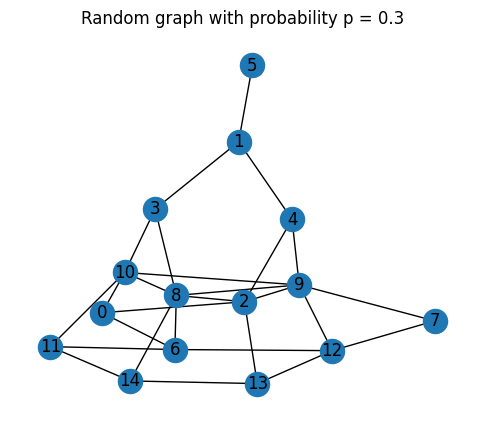

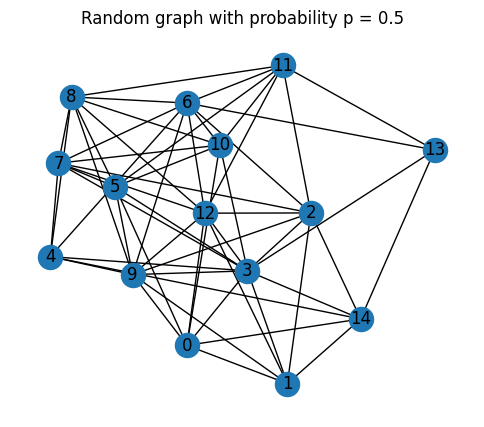

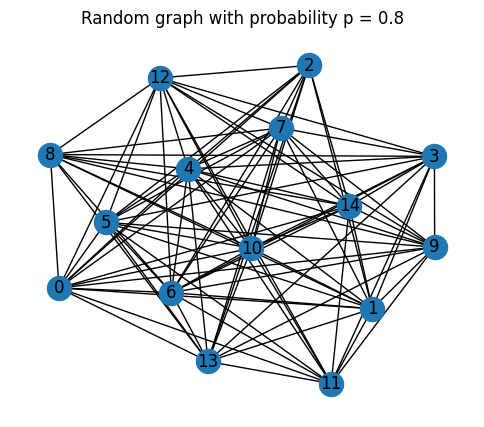

In [58]:
draw_graphs([graph_1, graph_2, graph_3], 
            'random', 
            [p_1, p_2, p_3])

The more probability $p$, the more edges the graph has.

Generate three different random graphs with different probability.

In [59]:
N = 2000
p_1 = 0.3
p_2 = 0.5
p_3 = 0.8
graph_1 = random_graph(N, p_1)
graph_2 = random_graph(N, p_2)
graph_3 = random_graph(N, p_3)

Report the number of vertices and edges.

In [60]:
print(f"Random graph with p = {p_1}" + numb_vert_ed(graph_1))
print(f"Random graph with p = {p_2}" + numb_vert_ed(graph_2))
print(f"Random graph with p = {p_3}" + numb_vert_ed(graph_3))

Random graph with p = 0.3 has 2000 nodes and 599404 edges
Random graph with p = 0.5 has 2000 nodes and 999035 edges
Random graph with p = 0.8 has 2000 nodes and 1599189 edges


Compute the average degree by two different ways. 

In [61]:
k_av_1 = av_degree(graph_1)
k_av_dist_1 = av_degree_dist(graph_1)

k_av_2 = av_degree(graph_2)
k_av_dist_2 = av_degree_dist(graph_2)

k_av_3 = av_degree(graph_3)
k_av_dist_3 = av_degree_dist(graph_3)

print(f"Random graph with p = {p_1} has average degree: {k_av_1} and average degree is calculated using degree distribution: {k_av_dist_1}")
print(f"Random graph with p = {p_2} has average degree: {k_av_2} and average degree is calculated using degree distribution: {k_av_dist_2}")
print(f"Random graph with p = {p_3} has average degree: {k_av_3} and average degree is calculated using degree distribution: {k_av_dist_3}")

Random graph with p = 0.3 has average degree: 599.404 and average degree is calculated using degree distribution: 599.4039999999998
Random graph with p = 0.5 has average degree: 999.035 and average degree is calculated using degree distribution: 999.0349999999995
Random graph with p = 0.8 has average degree: 1599.189 and average degree is calculated using degree distribution: 1599.1889999999999


Calculate the average degree using the distribution of random graph.

$\langle k \rangle = \sum_{k=0}^{N-1} kp_k = p(N-1)$

In [62]:
def k_av_rand(N, p):
    """
    Calculate the average degree using the distribution of random graph.
    def k_av_rand(N: int, p: float) -> float
    """
    return p * (N - 1)

In [63]:
k_av_rand_1 = k_av_rand(N, p_1)
k_av_rand_2 = k_av_rand(N, p_2)
k_av_rand_3 = k_av_rand(N, p_3)

print(f"Random graph with p = {p_1} has average degree: {k_av_rand_1}")
print(f"Random graph with p = {p_2} has average degree: {k_av_rand_2}")
print(f"Random graph with p = {p_3} has average degree: {k_av_rand_3}")

Random graph with p = 0.3 has average degree: 599.6999999999999
Random graph with p = 0.5 has average degree: 999.5
Random graph with p = 0.8 has average degree: 1599.2


Compute the variance of the degree distribution.

In [64]:
var_1 = var(graph_1)
var_2 = var(graph_2)
var_3 = var(graph_3)

print(f"Random graph with p = {p_1} has variance of the degree distribution: {var_1}")
print(f"Random graph with p = {p_2} has variance of the degree distribution: {var_2}")
print(f"Random graph with p = {p_3} has variance of the degree distribution: {var_3}")

Random graph with p = 0.3 has variance of the degree distribution: 411.83478400012245
Random graph with p = 0.5 has variance of the degree distribution: 473.5657750007231
Random graph with p = 0.8 has variance of the degree distribution: 320.3572790008038


Calculate the variance using the distribution of random graph.

$\sigma_k = p(1-p)(N-1)$

In [65]:
def var_rand(N, p):
    """
    Calculate the variance using the distribution of random graph.
    def var_rand(N: int, p: float) -> float
    """
    return p * (1 - p) * (N - 1)

In [66]:
var_rand_1 = var_rand(N, p_1)
var_rand_2 = var_rand(N, p_2)
var_rand_3 = var_rand(N, p_3)

print(f"Random graph with p = {p_1} has variane: {var_rand_1}")
print(f"Random graph with p = {p_2} has variane: {var_rand_2}")
print(f"Random graph with p = {p_3} has variane: {var_rand_3}")

Random graph with p = 0.3 has variane: 419.78999999999996
Random graph with p = 0.5 has variane: 499.75
Random graph with p = 0.8 has variane: 319.84


Generate the frequency plot for the degrees of the nodes and fit  model distributions to the obtained data (Binomial distribution)

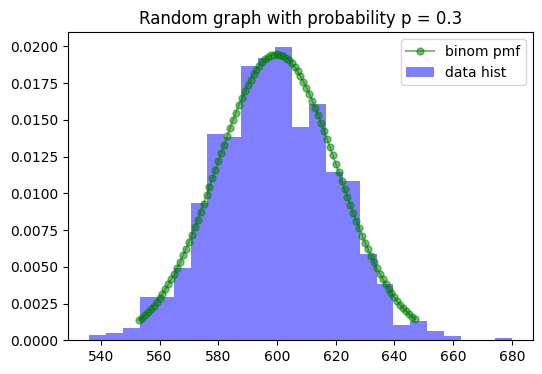

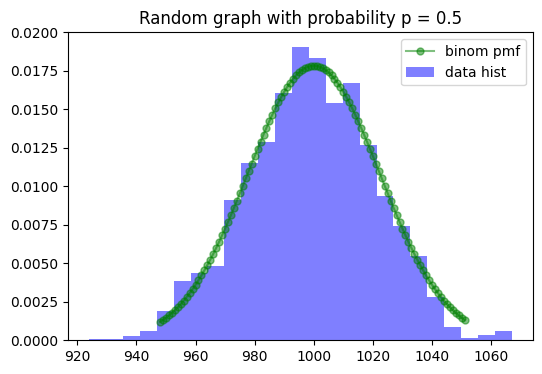

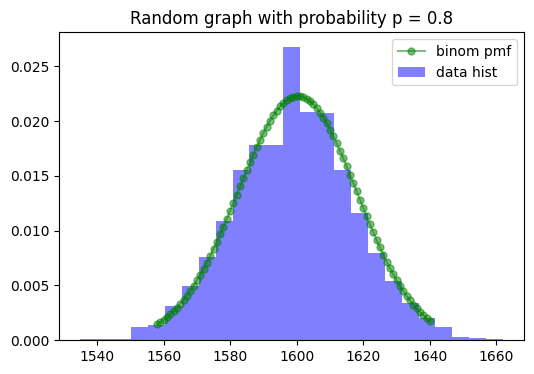

In [67]:
draw_hist_random(graph_1, p_1)
draw_hist_random(graph_2, p_2)
draw_hist_random(graph_3, p_3)

Real data and the distribution line seem to be similar.

## Watts-Strogatz model

Generation of the network:
1. Start with a ring of nodes, each node being connected to their K neighbors (high clustering).
2. With probability $p$ each link is rewired to a randomly chosen node. For small $p$ the network maintains high clustering, but the random long-range links can drastically decrease the distances between nodes.
3. For $p = 1$ all links are rewired, so the network turns into a random network.

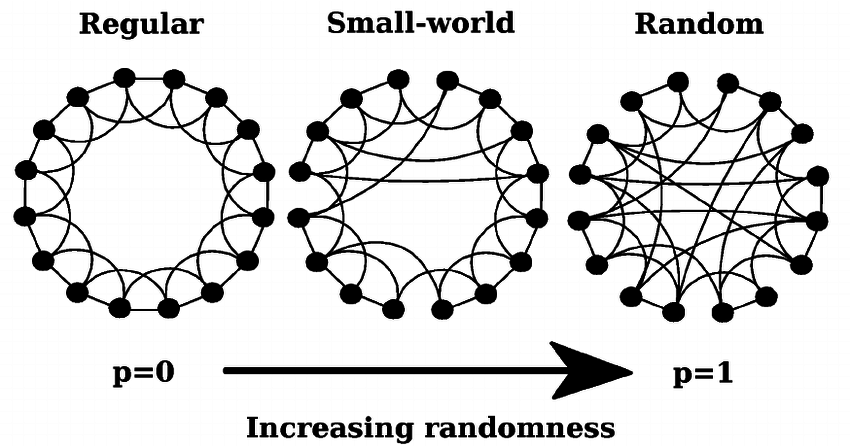

In [68]:
def watts_strogatz_graph(N, K, p):
    """
    Generate the Watts-Strogatz graph G(N, K, p) with N nodes, K neighbors and probability p.
    def watts_strogatz_graph(N: int, K: int, p: float) -> nx.Graph
    """
    if K >= N:
        print("K must be smaller than N")
        return None
    
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    k = K // 2
    
    for i in range(N):
        for j in range(1, k+1):
            G.add_edge(i, (i+j) % N)
            
    for e in G.edges:
        q = random.uniform(0, 1)
        if q < p:
            v = random.randint(0, N-1)
            while v == e[0] or [e[0], v] in G.edges:
                v = random.randint(0, N-1)
            G.add_edge(e[0], v)
            G.remove_edge(e[0], e[1])
    return G

Visualize Watts-Strogatz_graph $G(N, K, p)$ with 15 nodes.

In [69]:
N = 15
K = 4
p_1 = 0
p_2 = 0.5
p_3 = 1
graph_1 = watts_strogatz_graph(N, K, p_1)
graph_2 = watts_strogatz_graph(N, K, p_2)
graph_3 = watts_strogatz_graph(N, K, p_3)

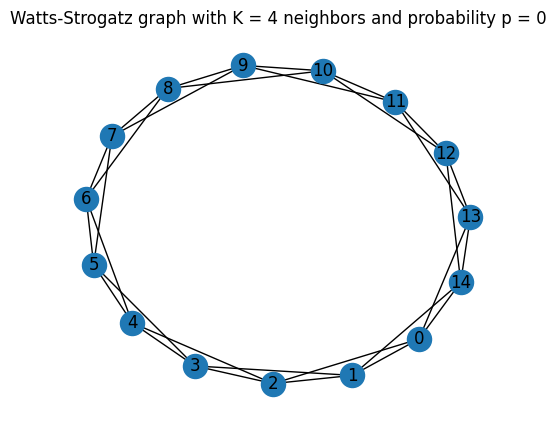

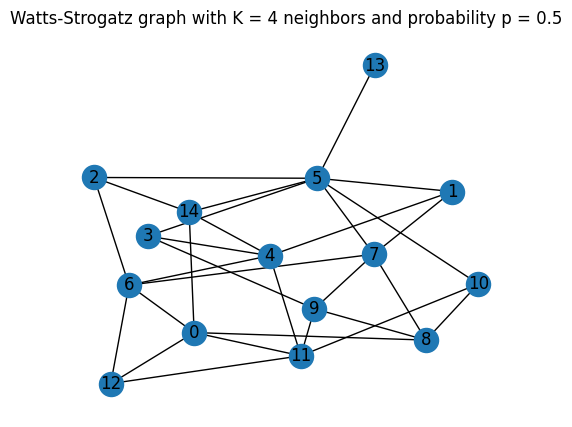

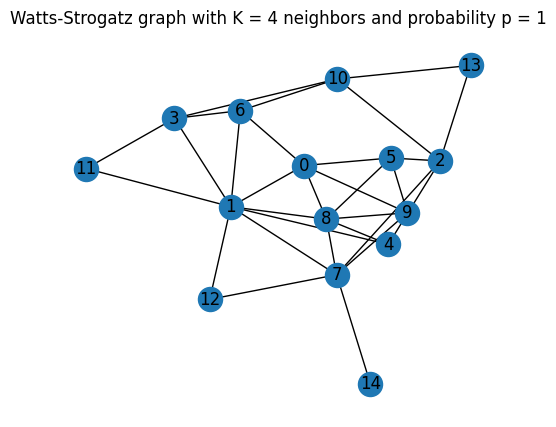

In [70]:
draw_graphs([graph_1, graph_2, graph_3], 
            'ws', 
            [[K, p_1], [K, p_2], [K, p_3]])

Generate three different random graphs with different probability.

In [71]:
N = 2000
K = 4
p_1 = 0
p_2 = 0.5
p_3 = 1
graph_1 = watts_strogatz_graph(N, K, p_1)
graph_2 = watts_strogatz_graph(N, K, p_2)
graph_3 = watts_strogatz_graph(N, K, p_3)

Report the number of vertices and edges.

In [72]:
print(f"Watts-Strogatz graph with K = {K}, p = {p_1}" + numb_vert_ed(graph_1))
print(f"Watts-Strogatz graph with K = {K}, p = {p_2}" + numb_vert_ed(graph_2))
print(f"Watts-Strogatz graph with K = {K}, p = {p_3}" + numb_vert_ed(graph_3))

Watts-Strogatz graph with K = 4, p = 0 has 2000 nodes and 4000 edges
Watts-Strogatz graph with K = 4, p = 0.5 has 2000 nodes and 4000 edges
Watts-Strogatz graph with K = 4, p = 1 has 2000 nodes and 4000 edges


Compute the average degree by two different ways. 

In [73]:
k_av_1 = av_degree(graph_1)
k_av_dist_1 = av_degree_dist(graph_1)

k_av_2 = av_degree(graph_2)
k_av_dist_2 = av_degree_dist(graph_2)

k_av_3 = av_degree(graph_3)
k_av_dist_3 = av_degree_dist(graph_3)

print(f"Watts-Strogatz graph with K = {K}, p = {p_1} has average degree: {k_av_1} and average degree is calculated using degree distribution: {k_av_dist_1}")
print(f"Watts-Strogatz graph with K = {K}, p = {p_2} has average degree: {k_av_2} and average degree is calculated using degree distribution: {k_av_dist_2}")
print(f"Watts-Strogatz graph with K = {K}, p = {p_3} has average degree: {k_av_3} and average degree is calculated using degree distribution: {k_av_dist_3}")

Watts-Strogatz graph with K = 4, p = 0 has average degree: 4.0 and average degree is calculated using degree distribution: 4.0
Watts-Strogatz graph with K = 4, p = 0.5 has average degree: 4.0 and average degree is calculated using degree distribution: 4.0
Watts-Strogatz graph with K = 4, p = 1 has average degree: 4.0 and average degree is calculated using degree distribution: 4.0


Compute the variance of the degree distribution.

In [74]:
var_1 = var(graph_1)
var_2 = var(graph_2)
var_3 = var(graph_3)

print(f"Watts-Strogatz graph with K = {K}, p = {p_1} has variance of the degree distribution: {var_1}")
print(f"Watts-Strogatz graph with K = {K}, p = {p_2} has variance of the degree distribution: {var_2}")
print(f"Watts-Strogatz graph with K = {K}, p = {p_3} has variance of the degree distribution: {var_3}")

Watts-Strogatz graph with K = 4, p = 0 has variance of the degree distribution: 0.0
Watts-Strogatz graph with K = 4, p = 0.5 has variance of the degree distribution: 1.4969999999999999
Watts-Strogatz graph with K = 4, p = 1 has variance of the degree distribution: 1.8900000000000006


Generate the frequency plot for the degrees of the nodes.

Fit a model distribution to the obtained data 
- for $p = 0$ the the degree distribution is just a Dirac delta function (distribution) centered at $K$. Also known as the unit impulse.
- in the limiting case of $p = 1$ it is Poisson distribution

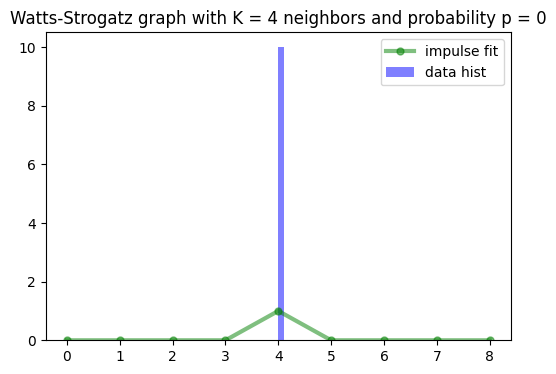

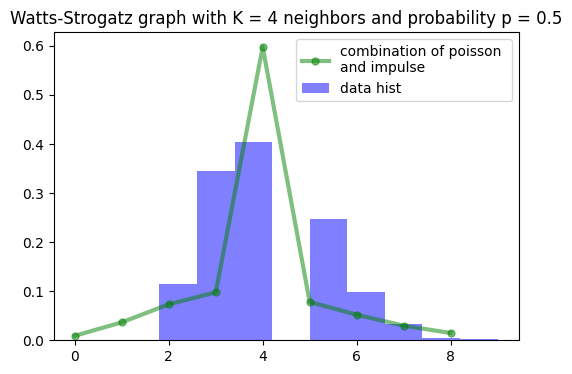

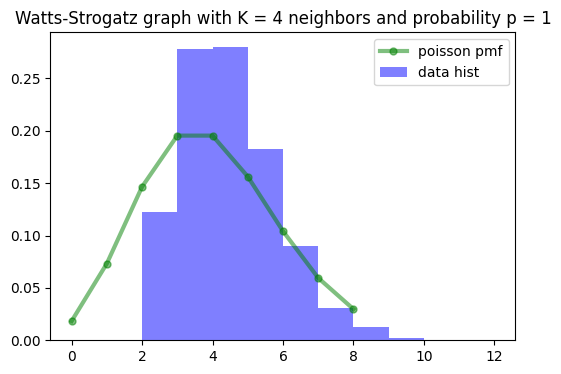

In [75]:
draw_hist_ws(graph_1, K, p_1)
draw_hist_ws(graph_2, K, p_2)
draw_hist_ws(graph_3, K, p_3)

For $p = 0$: the unit impulse has value $1$ and histogram has height about 10.

For $p = 1$: Poisson plot is lower than the data histogram.

For $p = 0.5$ (intermediate option): do plot of combination of Poisson distributions and unit impulse (Poisson pmf $\cdot p_2 +$ impulse $\cdot (1 - p_2)$).

## Barabasi-Albert model

Generation of the network:
1. Start with $m_0$ nodes linked together. The links between them may be chosen arbitrarily, as long as each node has at least one link.
2. At each time step add a new node with $m (≤m_0)$ links that connect the new node to $m$ nodes already in the network. Probability that a link of the new node connects to node $i$ depends on the degree $k_i$ as $\pi(k_i)=\frac{k_i}{\sum_j k_j}$

In [76]:
def barabasi_albert_graph(N, m0, m):
    """
    Generate the Barabasi-Albert graph G(N, m0, m) with N nodes, m0 nodes at the beginning and m links for new node.
    def barabasi_albert_graph(N: int, m0: int, m: int) -> nx.Graph
    """
    if m0 >= N:
        print("m0 must be smaller than N")
        return None
    
    if m >= N:
        print("m must be smaller than N")
        return None
    
    if m > m0:
        print("m must be smaller or equal than m0")
        return None
    
    G = nx.Graph()
    G.add_nodes_from(range(m0))
    
    for i in range(m0 + 1):
        G.add_edge(i % m0, (i+1) % m0)
            
    for i in range(m0, N):
        ver = np.array(range(i))
        k_i = np.array([d for n, d in G.degree()])
        pi_i = k_i / sum(k_i)
        
        for j in range(m):
            v = random.choices(ver, weights = pi_i)[0]
            G.add_edge(i, v)
            ind = np.where(ver == v)
            ver = np.delete(ver, ind)
            pi_i = np.delete(pi_i, ind)
    return G

Visualize random graph $G(N, p)$ with 15 nodes.

In [77]:
N = 15
m0 = 4
m_1 = 2
m_2 = 3
m_3 = 4
graph_1 = barabasi_albert_graph(N, m0, m_1)
graph_2 = barabasi_albert_graph(N, m0, m_2)
graph_3 = barabasi_albert_graph(N, m0, m_3)

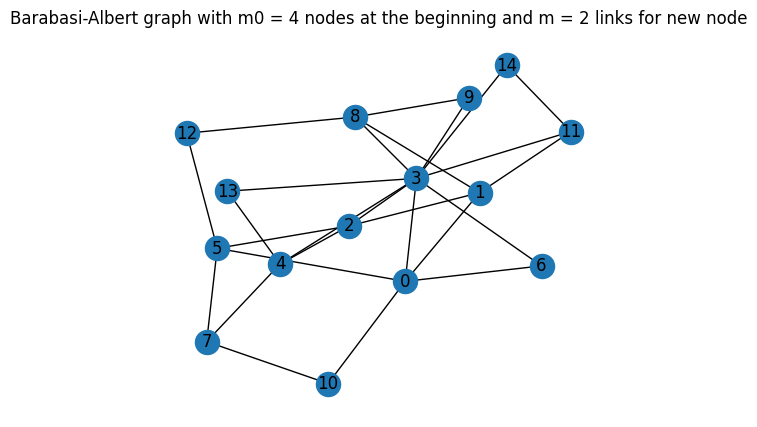

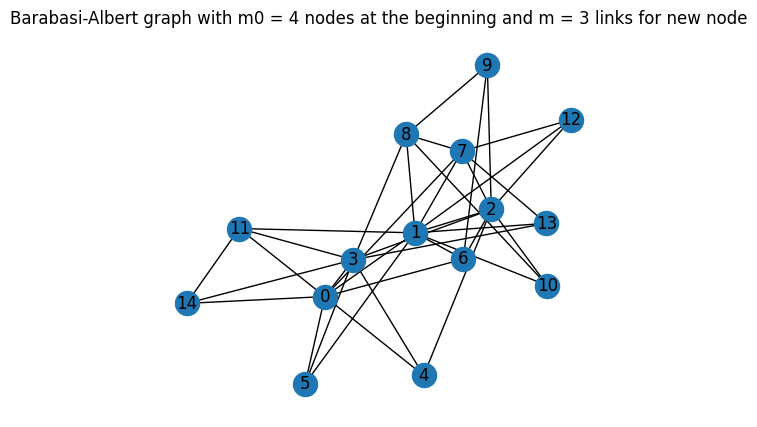

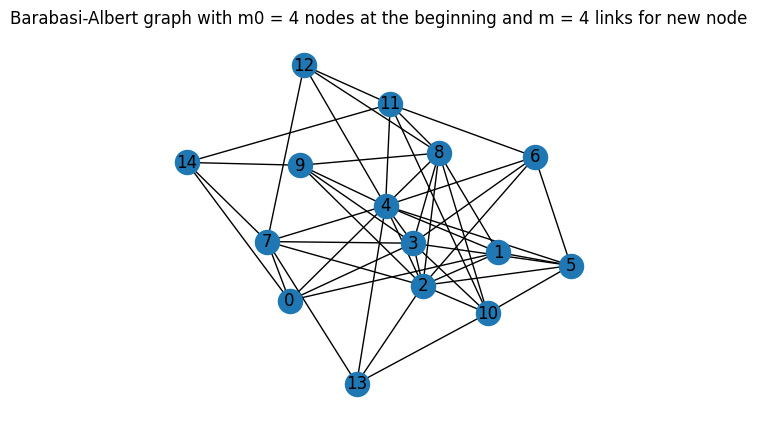

In [78]:
draw_graphs([graph_1, graph_2, graph_3], 
            'ba', 
            [[m0, m_1], [m0, m_2], [m0, m_3]])

Generate three different random graphs with different probability.

In [79]:
N = 2000
m0 = 4
m_1 = 2
m_2 = 3
m_3 = 4
graph_1 = barabasi_albert_graph(N, m0, m_1)
graph_2 = barabasi_albert_graph(N, m0, m_2)
graph_3 = barabasi_albert_graph(N, m0, m_3)

Report the number of vertices and edges.

In [80]:
print(f"Barabasi-Albert graph with m0 = {m0}, m = {m_1}" + numb_vert_ed(graph_1))
print(f"Barabasi-Albert graph with m0 = {m0}, m = {m_2}" + numb_vert_ed(graph_2))
print(f"Barabasi-Albert graph with m0 = {m0}, m = {m_3}" + numb_vert_ed(graph_3))

Barabasi-Albert graph with m0 = 4, m = 2 has 2000 nodes and 3996 edges
Barabasi-Albert graph with m0 = 4, m = 3 has 2000 nodes and 5992 edges
Barabasi-Albert graph with m0 = 4, m = 4 has 2000 nodes and 7988 edges


After time $t \; t = M - m_0$ we have $N = m_0 + t$ nodes and $M = m_0 + mt$ edges

In [81]:
n = m0 + (N - m0)
m1 = m0 + m_1 * (N - m0)
m2 = m0 + m_2 * (N - m0)
m3 = m0 + m_3 * (N - m0)

print(f"Barabasi-Albert graph with m0 = {m0}, m = {m_1} has {n} nodes and {m1} edges")
print(f"Barabasi-Albert graph with m0 = {m0}, m = {m_2} has {n} nodes and {m2} edges")
print(f"Barabasi-Albert graph with m0 = {m0}, m = {m_3} has {n} nodes and {m3} edges")

Barabasi-Albert graph with m0 = 4, m = 2 has 2000 nodes and 3996 edges
Barabasi-Albert graph with m0 = 4, m = 3 has 2000 nodes and 5992 edges
Barabasi-Albert graph with m0 = 4, m = 4 has 2000 nodes and 7988 edges


Compute the average degree by two different ways. 

In [82]:
k_av_1 = av_degree(graph_1)
k_av_dist_1 = av_degree_dist(graph_1)

k_av_2 = av_degree(graph_2)
k_av_dist_2 = av_degree_dist(graph_2)

k_av_3 = av_degree(graph_3)
k_av_dist_3 = av_degree_dist(graph_3)

print(f"Barabasi-Albert graph with m0 = {m0}, m = {m_1} has average degree: {k_av_1} and average degree is calculated using degree distribution: {k_av_dist_1}")
print(f"Barabasi-Albert graph with m0 = {m0}, m = {m_2} has average degree: {k_av_2} and average degree is calculated using degree distribution: {k_av_dist_2}")
print(f"Barabasi-Albert graph with m0 = {m0}, m = {m_3} and average degree is calculated using degree distribution: {k_av_dist_3}")

Barabasi-Albert graph with m0 = 4, m = 2 has average degree: 3.996 and average degree is calculated using degree distribution: 3.9959999999999996
Barabasi-Albert graph with m0 = 4, m = 3 has average degree: 5.992 and average degree is calculated using degree distribution: 5.991999999999999
Barabasi-Albert graph with m0 = 4, m = 4 and average degree is calculated using degree distribution: 7.987999999999998


Compute the variance of the degree distribution.

In [83]:
var_1 = var(graph_1)
var_2 = var(graph_2)
var_3 = var(graph_3)

print(f"Watts-Strogatz graph with K = 4, p = {p_1} has variance of the degree distribution: {var_1}")
print(f"Watts-Strogatz graph with K = 4, p = {p_2} has variance of the degree distribution: {var_2}")
print(f"Watts-Strogatz graph with K = 4, p = {p_3} has variance of the degree distribution: {var_3}")

Watts-Strogatz graph with K = 4, p = 0 has variance of the degree distribution: 28.706984
Watts-Strogatz graph with K = 4, p = 0.5 has variance of the degree distribution: 51.165936000000016
Watts-Strogatz graph with K = 4, p = 1 has variance of the degree distribution: 84.46085600000009


Generate the frequency plot for the degrees of the nodes.

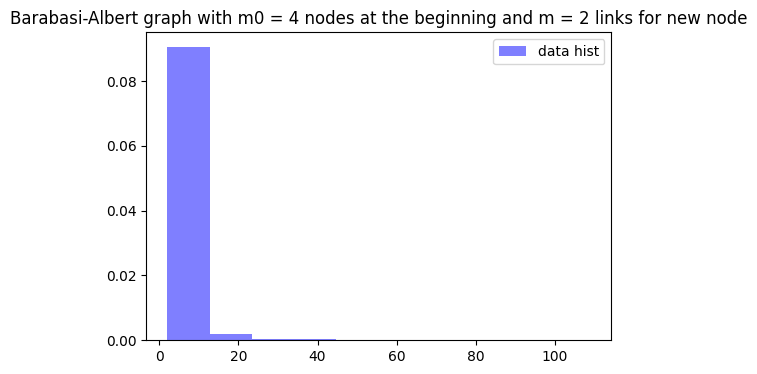

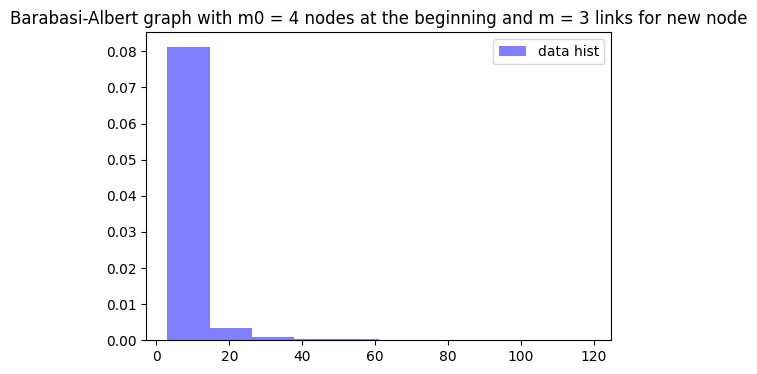

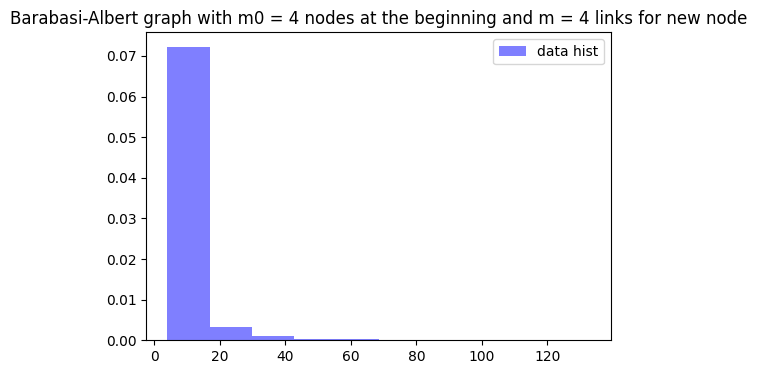

In [84]:
draw_hist_bs(graph_1, m0, m_1)
draw_hist_bs(graph_2, m0, m_2)
draw_hist_bs(graph_3, m0, m_3)

# Task 2

## Web Scraping. Facebook

Sources:

Web Scraping Facebook Friends List Using Selenium in Python 
https://www.youtube.com/watch?v=KQiDLVa9sX4

How to Scrape Profile Links of Facebook Friends with Python
https://aniquekhan.com/how-to-scrape-profile-links-of-facebook-friends-with-python/

Read your network of friends in Facebook by scraping with Python
https://medium.com/analytics-vidhya/read-your-network-of-friends-in-facebook-by-scraping-with-python-a012adabb713

Organize your wedding with social network analysis in Python
https://rubchume.medium.com/organize-your-wedding-with-social-network-analysis-in-python-aeab9d8814b3

In [ ]:
# pip install selenium

In [ ]:
# pip install webdriver_manager

In [247]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass
from webdriver_manager.chrome import ChromeDriverManager 
import requests
import json
import re
import urllib

Save my login and password

In [9]:
user_id = "masha.kogut2001@gmail.com"
my_password = getpass.getpass()

my_id = "profile.php?id=100005913558261"
my_name = "Mariia Kohut"
my_link = "https://www.facebook.com/profile.php?id=100005913558261"

········


Open browser. Open Facebook

In [ ]:
driver = webdriver.Chrome(executable_path = ChromeDriverManager().install())
driver.get("https://www.facebook.com/")
driver.maximize_window()

Accept cookies

In [5]:
driver.find_element(By.XPATH, '//button[@class="_42ft _4jy0 _9xo6 _4jy3 _4jy1 selected _51sy"]').click()

Fill the email field

In [12]:
email_field = driver.find_element(By.ID, 'email')
email_field.clear()
email_field.send_keys(user_id)

Fill the password field

In [13]:
pass_field = driver.find_element(By.ID, 'pass')
pass_field.clear()
pass_field.send_keys(my_password)

Click button "Login"

In [14]:
driver.find_element(By.XPATH, '//button[@class="_42ft _4jy0 _6lth _4jy6 _4jy1 selected _51sy"]').click()

Go to the page with list of my friends

In [15]:
driver.get('https://www.facebook.com/me/friends')

Use of the GraphQL API to find my friends.

For the backend to provide you with the information you ask, it has to be sure you are who you say you are. And it does that in two ways. First, you should set the cookies for the session to be the same the Chrome instance is using. And second, you must send, in the http request data, a field called `fb_dtsg`.

Access cookie fields with the Selenium driver, and assign them to a requests session

In [16]:
session = requests.session()
session.cookies.update({
    cookie["name"]: cookie["value"]
    for cookie in driver.get_cookies()
})

The `fb_dtsg` token can be found by finding a pattern in the html source of the friend list page

In [17]:
pattern = r'\["DTSGInitData",\[\],{"token":"\S+","async_get_token":"\S+?"},\d+\]'
match = re.search(pattern, driver.page_source)
fb_dtsg_token = json.loads(match.group())[2]["token"]

It seems that when requesting your list of friends, each friend has an alphanumeric long code (a cursor) associated to it.

The field page_info is an object with two fields: has_next_page and end_cursor. has_next_page is a Boolean that tells if there are more friends to request or if it is the end of the list. In the case there are more, end_cursor is the cursor of that next friend.

Get an http response with our friends’ data.

Parse it to a Python dictionary.

Do that until no friends are left.

In [18]:
page_info = dict(has_next_page = True, end_cursor = None)

url = 'https://www.facebook.com/api/graphql/'

headers = {
    "accept": "*/*",
    "accept-language": "es-ES,es;q=0.9",
    "content-type": "application/x-www-form-urlencoded",
    "sec-ch-ua": "\" Not;A Brand\";v=\"99\", \"Google Chrome\";v=\"91\", \"Chromium\";v=\"91\"",
    "sec-ch-ua-mobile": "?0",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-origin",
    "x-fb-friendly-name": "FriendingCometFriendsListPaginationQuery",
    "referrer": "https://www.facebook.com/friends/list",
    "referrerPolicy": "strict-origin-when-cross-origin",
}

friends = []

while page_info["has_next_page"]:
    response = session.post(
        url,
        headers = headers,
        data = urllib.parse.urlencode(
            {
                "fb_dtsg": fb_dtsg_token,
                "fb_api_req_friendly_name": "FriendingCometFriendsListPaginationQuery",
                "variables": json.dumps(
                    {
                        "count": 30,
                        "cursor": page_info["end_cursor"],
                        "scale": 1,
                    }
                ).replace(" ", ""),
                "doc_id": 4268740419836267,
            }
        )
    )
    
    response_dict = json.loads(response.content)
    friend_objects = response_dict["data"]["viewer"]["all_friends"]["edges"]

    friends += [
        dict(
            user_id = friend['node']['url'].partition(".com/")[2],
            name = friend['node']['name'],
            link = friend['node']['url']
        )
        for friend in friend_objects
        if friend["node"]["__typename"] == "User"
    ]
    
    page_info = response_dict["data"]["viewer"]["all_friends"]["page_info"]
    
print(f"Number of friends: {len(friends)}")

Number of friends: 61


In [19]:
friends

[{'user_id': 'profile.php?id=100007502475142',
  'name': 'Миша Тяпкин',
  'link': 'https://www.facebook.com/profile.php?id=100007502475142'},
 {'user_id': 'lisa.martynova.7',
  'name': 'Лиза Мартынова',
  'link': 'https://www.facebook.com/lisa.martynova.7'},
 {'user_id': 'cheret.katherine',
  'name': 'Kasia Oczeretian',
  'link': 'https://www.facebook.com/cheret.katherine'},
 {'user_id': 'profile.php?id=100008389686721',
  'name': 'Мария Микенина Микенина Мария',
  'link': 'https://www.facebook.com/profile.php?id=100008389686721'},
 {'user_id': 'profile.php?id=100006868091656',
  'name': 'Александр Когут',
  'link': 'https://www.facebook.com/profile.php?id=100006868091656'},
 {'user_id': 'liza.shulgina.1',
  'name': 'Shulhina Lisa',
  'link': 'https://www.facebook.com/liza.shulgina.1'},
 {'user_id': 'sasha.shestak.35',
  'name': 'Sasha Shestak',
  'link': 'https://www.facebook.com/sasha.shestak.35'},
 {'user_id': 'profile.php?id=100006500923354',
  'name': 'Женя Садовая',
  'link': 'ht

Now. Get friends of my friends.

Visit, one by one, each of my friends’ profiles, go to their friends’ section, scroll down until all of them have appeared, and finally read them and save them.

There are two types of URLs when it comes to user profiles. Depending on which of them we have, the friends page has a slightly different URL. In the first case, it is a query parameter. In the second case, it is part of the path.

In [20]:
def visit_friends_page(friend):
    profile_link = friend["link"]
    url_parsed = urllib.parse.urlparse(profile_link)

    if url_parsed.path == "/profile.php":
        friends_link =  f"{profile_link}&sk=friends"
    else:
        friends_link = f"{profile_link}/friends"

    driver.get(friends_link)
    sleep(0.5)

If I find that element, then I will scroll down. And if I find it again, I will scroll down again, until it has disappeared (until all friends have been loaded).

In [21]:
loading_friends_panel_class = "x6s0dn4 x1lq5wgf xgqcy7u x30kzoy x9jhf4c x1olyfxc x9f619 x78zum5 x1e56ztr x1gefphp xyamay9 x1pi30zi x1l90r2v x1swvt13"
loading_friends_panel_selector = f"div[class='{loading_friends_panel_class}'][data-visualcompletion='loading-state']"
   
def wait_for_every_friend_to_load():
    loading_element = driver.find_elements(By.CSS_SELECTOR, loading_friends_panel_selector)

    while len(loading_element) > 0:
        driver.find_element_by_xpath('//body').send_keys(Keys.END)
        sleep(0.5)
        loading_element = driver.find_elements(By.CSS_SELECTOR, loading_friends_panel_selector)


The remaining part is to just read all friends. 

First, find the panel with friends.

In [22]:
friends_panel_selector = "div[data-pagelet='ProfileAppSection_0']"

Each of the friends will appear in his own “card”, and his or her name is a `<a>` element.

In [23]:
friend_link_class = ("x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou "
                     "x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm "
                     "xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd "
                     "x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x1heor9g xt0b8zv")
friend_link_selector = f"a[class='{friend_link_class}']"

Each of the links for friend has two pieces of useful information. On the one hand there is the text, which is the name of the mutual friend. The other is the URL to which it redirects, which is his or her profile link.

Get list of all friends of my friends.

In [24]:
friends_all = {}
num_friends = len(friends)
for i, friend in enumerate(friends, start = 1):
    print(f"Reading friends with {friend['name']}. ({i} of {num_friends})")
    
    visit_friends_page(friend)

    wait_for_every_friend_to_load()
    
    friends_pannel = driver.find_element(By.CSS_SELECTOR, friends_panel_selector)
    
    friend_links = driver.find_elements(By.CSS_SELECTOR, friend_link_selector)
    
    friends_of_friend = []
    for link in friend_links:
        name = link.text
        link = link.get_attribute("href")
        
        friends_of_friend.append(
            dict(
                user_id = link.partition(".com/")[2],
                name = name,
                link = link,
            )
        )
    
    friends_all[friend["user_id"]] = friends_of_friend

Reading friends with Миша Тяпкин. (1 of 61)
Reading friends with Лиза Мартынова. (2 of 61)
Reading friends with Kasia Oczeretian. (3 of 61)
Reading friends with Мария Микенина Микенина Мария. (4 of 61)
Reading friends with Александр Когут. (5 of 61)
Reading friends with Shulhina Lisa. (6 of 61)
Reading friends with Sasha Shestak. (7 of 61)
Reading friends with Женя Садовая. (8 of 61)
Reading friends with Ольга Ханевич. (9 of 61)
Reading friends with Oleksii Demydenko. (10 of 61)
Reading friends with Karolina Haieva. (11 of 61)
Reading friends with Victoria Boichenko. (12 of 61)
Reading friends with Igors Poznakovs. (13 of 61)
Reading friends with Olha Yekhanurova. (14 of 61)
Reading friends with Катя Лотоцкая. (15 of 61)
Reading friends with Marichka Hladka. (16 of 61)
Reading friends with Александра Гержан. (17 of 61)
Reading friends with Генрих Груз. (18 of 61)
Reading friends with Богдан Мричко. (19 of 61)
Reading friends with Наталия Мизюк. (20 of 61)
Reading friends with Саша Мото

Add my profile.

In [29]:
my_friends = []
for f in friends:
    my_friends.append(dict(
            user_id = f['user_id'],
            name = f['name'],
            link = f['link'],
        ))

friends_all[my_id] = my_friends

Save friends to the file.

In [37]:
with open("my_friends_network", "w") as outfile:
    json.dump(friends_all, outfile)

Open file.

In [248]:
filename = "my_friends_network"
with open(filename, 'r', encoding="utf-8") as file:
    network = json.load(file)

In [250]:
from operator import itemgetter
import pandas as pd

### Create graph.

In [251]:
graph = nx.Graph()

In [252]:
edges = []
for friend_id, frs_of_fr in network.items():
    for fr in frs_of_fr:
        if friend_id != fr["user_id"]:
            edges.append((friend_id, fr["user_id"]))
    
graph.add_edges_from(edges)

### Visualize the network.

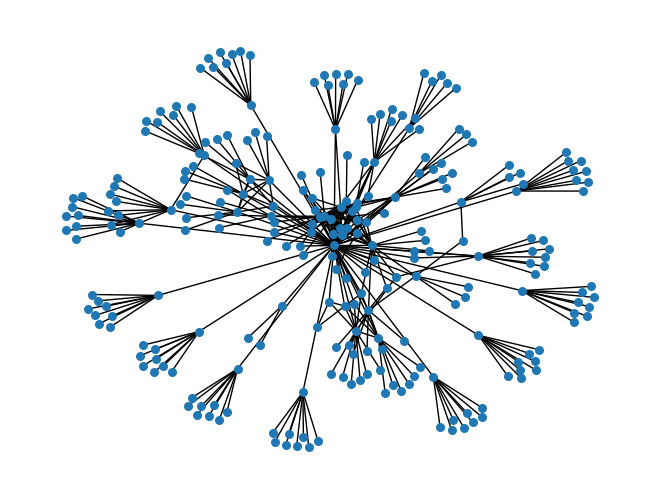

In [253]:
nx.draw(graph, node_size = 30)

### Determine the number of nodes and edges in the network

In [254]:
V = nx.number_of_nodes(graph)
E = nx.number_of_edges(graph)

In [255]:
print(f"The network has {V} nodes and {E} edges")

The network has 259 nodes and 369 edges


### Find celebrities in the network (hint: degree centrality).


Relative degree centrality:

$C_D(i) = \frac{c_D(i)}{\text{highest possible degree}} = \frac{c_D(i)}{N-1}=\frac{k_i}{N-1}$

- $k_i$ is the degree of node $i$
- if there are no self-loops in a network of $N$ nodes, $N − 1$ is the highes possible degree of a node


In [256]:
degrees = dict(nx.degree(graph))

In [257]:
DC = np.array(list(degrees.values())) / (V - 1)
DC = list(zip(degrees.keys(), DC))

In [258]:
sorted_DC = sorted(DC, key = itemgetter(1), reverse = True)
sorted_DC[:5]

[('profile.php?id=100005913558261', 0.2364341085271318),
 ('dana.kalantaievska', 0.08914728682170543),
 ('kateryna.bilorus', 0.08139534883720931),
 ('liza.shulgina.1', 0.08139534883720931),
 ('profile.php?id=100005733886175', 0.07751937984496124)]

In [259]:
DC_nx = nx.degree_centrality(graph)
sorted_DC_nx = dict(sorted(DC_nx.items(), key = itemgetter(1), reverse = True))
sorted_DC_nx

{'profile.php?id=100005913558261': 0.2364341085271318,
 'dana.kalantaievska': 0.08914728682170542,
 'kateryna.bilorus': 0.08139534883720931,
 'liza.shulgina.1': 0.08139534883720931,
 'profile.php?id=100005733886175': 0.07751937984496124,
 'profile.php?id=100009221965041': 0.05426356589147287,
 'chitalova.kz': 0.050387596899224806,
 'marta.gret.73': 0.050387596899224806,
 'superbulgakov': 0.046511627906976744,
 'igors.poznakovs.3': 0.046511627906976744,
 'juliana.amirhan': 0.04263565891472868,
 'vikbchnk': 0.03875968992248062,
 'profile.php?id=100043684884846': 0.03875968992248062,
 'svetlana.fastovets.3': 0.03488372093023256,
 'profile.php?id=100004744154350': 0.03488372093023256,
 'profile.php?id=100009501316928': 0.03488372093023256,
 'irina.kostenko.752': 0.03488372093023256,
 'kostia.skopych': 0.03488372093023256,
 'iga.switalska.1': 0.03488372093023256,
 'profile.php?id=100005980576453': 0.03488372093023256,
 'ola.winiarska.121': 0.03488372093023256,
 'profile.php?id=1000185209049

### Check the data for friend paradox

This phenomenon states that most people have fewer friends than their friends have, on average.

Get the number of friends a specific person has

In [260]:
def get_num_friends(graph, id):
    """
    Get number of friends of a person with specified id.      
    def get_num_friends(graph: nx.Graph, id: str) -> int 
    """
    return len(list(graph.neighbors(id)))

In [261]:
get_num_friends(graph, 'dana.kalantaievska')

23

Get the numbers of friends a person’s friends have

In [262]:
def get_num_friends_map(graph):
    """
    Get a dictionary of people and their number of friends.
    def get_num_friends_map(graph: nx.Graph) -> dict
    """
    all_people = list(graph.nodes)
    return {name: get_num_friends(graph, name) for name in all_people}
    
def get_num_friends_of_a_person_friends(graph, person_id, num_friends_map):
    """
    Get the numbers of friends a person’s (person_id) friends have.
    def get_num_friends_of_a_person_friends(graph: nx.Graph, person_id: str, num_friends_map: dict) -> list
    """
    friends = list(graph.neighbors(person_id))
    return [num_friends_map[id] for id in friends]

In [263]:
num_friends_map = get_num_friends_map(graph)
get_num_friends_of_a_person_friends(graph, "dana.kalantaievska", num_friends_map)

[7, 7, 21, 4, 7, 5, 5, 5, 2, 14, 5, 8, 5, 6, 5, 20, 1, 1, 3, 2, 3, 5, 61]

Get the number of friends a person’s friends have on average

In [264]:
def get_average_friends_of_a_person_friends(graph, person_id):
    """
    Get the average number of friends a person's friends have
    def get_average_friends_of_a_person_friends(graph: nx.Graph, person_id: str) -> float
    """
    
    num_friends_map = get_num_friends_map(graph)
    num_friends_of_friends = get_num_friends_of_a_person_friends(graph, person_id, num_friends_map)
    return np.mean(num_friends_of_friends)

In [265]:
get_average_friends_of_a_person_friends(graph, "dana.kalantaievska")

8.782608695652174

Get the number of friends for all people in the network

In [266]:
def get_friends_df(graph):
    """
    Get the number of friends for all people in the network
    def get_friends_df(graph: nx.Graph) -> pd.DataFrame
    """

    all_people = list(graph.nodes)
    num_friends = [
        {
            "person_id": person_id,
            "num_friends": get_num_friends(graph, person_id),
            "avg_friends_of_friends": round(
                get_average_friends_of_a_person_friends(graph, person_id), 2
            ),
        }
        for person_id in all_people
    ]
    return pd.DataFrame(num_friends)

In [267]:
num_friends_sample = get_friends_df(graph)
num_friends_sample

,person_id,num_friends,avg_friends_of_friends
0,profile.php?id=100007502475142,7,14.29
1,chitalova.kz,13,7.85
2,juliana.amirhan,11,8.73
3,profile.php?id=100005913558261,61,7.75
4,HayDayOfficial/,2,5.50
...,...,...,...
254,profile.php?id=100068051431646,1,9.00
255,profile.php?id=100002007383141,4,26.75
256,tatka.shetsko,2,41.00
257,profile.php?id=100009787425500,1,61.00


Find whether a person's friends have more friends than him/her on average.

-The column `num_friends` shows the number of friends a person has.
-The column `avg_friends_of_friends` shows the number of friends a person’s friends have on average.
-The column `friends_have_more_friends` indicates whether a person’s friends have more friends than himself/herself on average.

In [273]:
num_friends_sample = num_friends_sample.assign(
    friends_have_more_friends = lambda df_: df_.avg_friends_of_friends > df_.num_friends
)
num_friends_sample

,person_id,num_friends,avg_friends_of_friends,friends_have_more_friends
0,profile.php?id=100007502475142,7,14.29,True
1,chitalova.kz,13,7.85,False
2,juliana.amirhan,11,8.73,False
3,profile.php?id=100005913558261,61,7.75,False
4,HayDayOfficial/,2,5.50,True
...,...,...,...,...
254,profile.php?id=100068051431646,1,9.00,True
255,profile.php?id=100002007383141,4,26.75,True
256,tatka.shetsko,2,41.00,True
257,profile.php?id=100009787425500,1,61.00,True


In [274]:
have_more_friends = num_friends_sample.friends_have_more_friends.sum()
print(have_more_friends)

235


Find out what percentage of people in the network have fewer friends than their friends have on average.

In [275]:
num_friends_sample.friends_have_more_friends.sum() / len(num_friends_sample)

0.9073359073359073

90,7% of people in the network have fewer friends than their friends have on average.

### Plot the degree distribution of the network

The distribution is similar to the power law distribution.

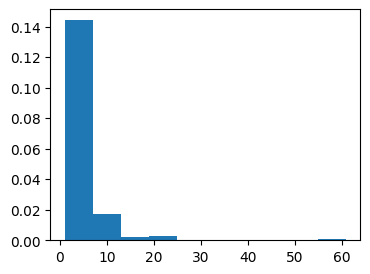

In [276]:
draw_hist(graph)

### Find communication bottlenecks (hint: betweenness centrality)

In [277]:
BC = nx.betweenness_centrality(graph)
sorted_BC = dict(sorted(BC.items(), key = itemgetter(1), reverse = True))
sorted_BC

{'profile.php?id=100005913558261': 0.9169926575500735,
 'igors.poznakovs.3': 0.06121617953126414,
 'profile.php?id=100004744154350': 0.06117093475703556,
 'profile.php?id=100009501316928': 0.06117093475703556,
 'irina.kostenko.752': 0.06117093475703556,
 'profile.php?id=100043684884846': 0.06117093475703556,
 'profile.php?id=100018520904965': 0.06117093475703556,
 'profile.php?id=100017728478688': 0.06117093475703556,
 'profile.php?id=100009377636729': 0.06117093475703556,
 'profile.php?id=100009214760210': 0.06117093475703556,
 'zla.zayka': 0.06117093475703556,
 'profile.php?id=100006593268932': 0.06117093475703556,
 'svetlana.bovarovskaya': 0.06117093475703556,
 'superbulgakov': 0.053748278184980736,
 'svetlana.fastovets.3': 0.05363013905227279,
 'alena.marushchak.9': 0.05363013905227279,
 'vikbchnk': 0.049047346142631676,
 'chitalova.kz': 0.04633316240863071,
 'marta.gret.73': 0.04623362390532783,
 'juliana.amirhan': 0.04606672096039574,
 'dima.sudarenko.7': 0.03845805809429011,
 'p